In [178]:
import pandas as pd

In [179]:
'''The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion 
of women in that state.

Open some of the census csv files in the navigator. How are they named? What kind of information do they hold? Will they 
help us make this graph?'''


state0 = pd.read_csv("Assignment/states0.csv")
type(state0)

pandas.core.frame.DataFrame

In [180]:
'''It will be easier to inspect this data once we have it in a DataFrame. You can’t even call .head() on these csvs! 
How are you supposed to read them?

Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those 
DataFrames together into one DataFrame, called something like us_census.'''

import glob


In [181]:
filenames = glob.glob('Assignment/states*.csv')
filenames

['Assignment\\states0.csv',
 'Assignment\\states1.csv',
 'Assignment\\states2.csv',
 'Assignment\\states3.csv',
 'Assignment\\states4.csv',
 'Assignment\\states5.csv',
 'Assignment\\states6.csv',
 'Assignment\\states7.csv',
 'Assignment\\states8.csv',
 'Assignment\\states9.csv']

In [182]:
#us_census_list = [pd.read_csv(f) for f in filenames]
#us_census = pd.DataFrame(us_census_list)

us_census = pd.DataFrame()
type(us_census)

pandas.core.frame.DataFrame

In [183]:
for f in filenames:
    data=pd.read_csv(f)
    us_census=us_census.append(data,ignore_index=True)

In [184]:
#Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?

us_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  60 non-null     int64 
 1   State       60 non-null     object
 2   TotalPop    60 non-null     int64 
 3   Hispanic    60 non-null     object
 4   White       60 non-null     object
 5   Black       60 non-null     object
 6   Native      60 non-null     object
 7   Asian       60 non-null     object
 8   Pacific     55 non-null     object
 9   Income      60 non-null     object
 10  GenderPop   60 non-null     object
dtypes: int64(2), object(9)
memory usage: 5.3+ KB


In [185]:
'''Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.

Start to make a plan for how to convert these columns into the right types for manipulation.

Regex to the Rescue'''

us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [186]:
#Use regex to turn the Income column into a format that is ready for conversion into a numerical type.

us_census['Income'] = us_census['Income'].str.replace(r'[^\d.]+', '')
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.78230266465,19087135M_19334329F


In [187]:
'''Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column.

Split the column into those two new columns using str.split and separating out those results.'''

split_data = us_census["GenderPop"].str.split("_")
data = split_data.to_list()
names = ["Men", "Women"]
new_df = pd.DataFrame(data, columns=names)
new_df.head()

,Men,Women
0,2341093M,2489527F
1,384160M,349215F
2,3299088M,3342840F
3,1451913M,1506295F
4,19087135M,19334329F


In [188]:
us_census=pd.concat([us_census, new_df], axis=1)

In [189]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.35860306644,2341093M_2489527F,2341093M,2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.74390243902,384160M_349215F,384160M,349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.82095490716,3299088M_3342840F,3299088M,3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.63396778917,1451913M_1506295F,1451913M,1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.78230266465,19087135M_19334329F,19087135M,19334329F


In [190]:
'''Convert both of the columns into numerical datatypes.

There is still an M or an F character in each entry! We should remove those before we convert.'''

us_census['Men'] = us_census['Men'].str.replace(r'[^\d.]+', '')
us_census['Women'] = us_census['Women'].str.replace(r'[^\d.]+', '')
us_census.head()


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.35860306644,2341093M_2489527F,2341093,2489527
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.74390243902,384160M_349215F,384160,349215
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.82095490716,3299088M_3342840F,3299088,3342840
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.63396778917,1451913M_1506295F,1451913,1506295
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.78230266465,19087135M_19334329F,19087135,19334329


In [191]:
us_census['Women'] = us_census['Women'].str.replace('', '0')


In [192]:
#us_census = us_census.convert_dtypes()

us_census[['Men', 'Women']] = us_census[['Men', 'Women']].astype(float)
#us_census = us_census.astype({"Men": int32, "Women": int})
us_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  60 non-null     int64  
 1   State       60 non-null     object 
 2   TotalPop    60 non-null     int64  
 3   Hispanic    60 non-null     object 
 4   White       60 non-null     object 
 5   Black       60 non-null     object 
 6   Native      60 non-null     object 
 7   Asian       60 non-null     object 
 8   Pacific     55 non-null     object 
 9   Income      60 non-null     object 
 10  GenderPop   60 non-null     object 
 11  Men         60 non-null     float64
 12  Women       60 non-null     float64
dtypes: float64(2), int64(2), object(9)
memory usage: 6.2+ KB


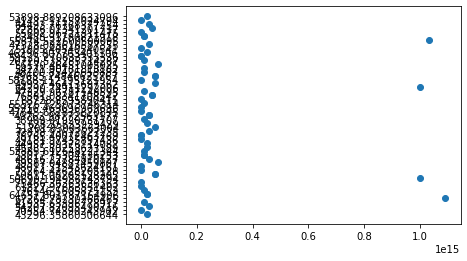

In [193]:
'''Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your
desk because you’ve wasted your whole day cleaning your data with no results to show!

Use matplotlib to make a scatterplot!

plt.scatter(the_women_column, the_income_column) 
Remember to call plt.show() to see the graph!'''
import matplotlib.pyplot as plt
plt.scatter(us_census["Women"], us_census["Income"])
plt.show()

In [194]:
'''Did you get an error? These monstrous csv files probably have nan values in them! Print out your column with the number 
of women per state to see.

We can fill in those nans by using pandas’ .fillna() function.

You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column,
you could use the TotalPop of that state minus the Men for that state.

Print out the Women column after filling the nan values to see if it worked!'''


print(us_census[["State","Women"]])
us_census["Women"] = us_census["TotalPop"]-us_census["Men"]

                   State         Women
0                Alabama  2.040809e+13
1                 Alaska  3.040902e+11
2                Arizona  3.030402e+13
3               Arkansas  1.050006e+13
4             California  1.090303e+15
5               Colorado  2.060300e+13
6               Colorado  2.060300e+13
7            Connecticut  1.080401e+13
8               Delaware  4.070800e+11
9   District of Columbia  3.040008e+11
10               Florida  1.000004e+15
11               Georgia  5.010203e+13
12               Georgia  5.010203e+13
13                Hawaii  6.090604e+11
14                 Idaho  8.000600e+11
15              Illinois  6.050506e+13
16               Indiana  3.030303e+13
17                  Iowa  1.050508e+13
18                  Iowa  1.050508e+13
19                Kansas  1.040503e+13
20              Kentucky  2.020303e+13
21             Louisiana  2.030604e+13
22                 Maine  6.070900e+11
23              Maryland  0.000000e+00
24              Maryland 

In [195]:
print(us_census[["State","Women"]])

                   State       Women
0                Alabama   2489527.0
1                 Alaska    349215.0
2                Arizona   3342840.0
3               Arkansas   1506295.0
4             California  19334329.0
5               Colorado   2630239.0
6               Colorado   2630239.0
7            Connecticut   1841615.0
8               Delaware    478041.0
9   District of Columbia    340810.0
10               Florida  10045763.0
11               Georgia   5123362.0
12               Georgia   5123362.0
13                Hawaii    696428.0
14                 Idaho    806083.0
15              Illinois   6556862.0
16               Indiana   3333382.0
17                  Iowa   1558931.0
18                  Iowa   1558931.0
19                Kansas   1453125.0
20              Kentucky   2233145.0
21             Louisiana   2364097.0
22                 Maine    679019.0
23              Maryland   3057895.0
24              Maryland   3057895.0
25         Massachusetts   3455936.0
2

In [196]:
#We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.

us_census["State"].duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28    False
29    False
30     True
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41    False
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
50    False
51    False
52    False
53    False
54     True
55    False
56    False
57    False
58    False
59    False
Name: State, dtype: bool

In [197]:
#Drop those duplicates using the .drop_duplicates() function.

us_census=us_census.drop_duplicates(subset =["State"])

In [198]:
us_census

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.35860306644,2341093M_2489527F,2341093.0,2489527.0
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.74390243902,384160M_349215F,384160.0,349215.0
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.82095490716,3299088M_3342840F,3299088.0,3342840.0
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.63396778917,1451913M_1506295F,1451913.0,1506295.0
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.78230266465,19087135M_19334329F,19087135.0,19334329.0
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787164906,2648667M_2630239F,2648667.0,2630239.0
7,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.5605875153,1751607M_1841615F,1751607.0,1841615.0
8,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.97663551402,448413M_478041F,448413.0,478041.0
9,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.36363636363,306674M_340810F,306674.0,340810.0
10,4,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,50690.194986743794,9600009M_10045763F,9600009.0,10045763.0


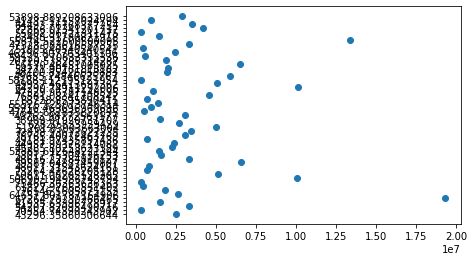

In [199]:
#Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

#Histograms of Race

plt.scatter(us_census["Women"], us_census["Income"])
plt.show()


In [200]:
#Now, your boss wants you to make a bunch of histograms out of the race data that you have. 
#Look at the .columns again to see what the race categories are.

us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')

In [201]:
'''Try to make a histogram for each one!

You will have to get the columns into numerical format, and those percentage signs will have to go.

Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows 
when making your last graph, but it couldn’t hurt to check for duplicates again.

Get Creative'''

us_census=us_census.replace('\%','',regex=True)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.7516156462584975,61.878656462585,31.25297619047618,0.4532312925170065,1.0502551020408146,0.03435374149659865,43296.35860306644,2341093M_2489527F,2341093.0,2489527.0
1,1,Alaska,733375,5.909580838323351,60.910179640718574,2.8485029940119775,16.39101796407186,5.450299401197604,1.0586826347305378,70354.74390243902,384160M_349215F,384160.0,349215.0
2,2,Arizona,6641928,29.565921052631502,57.120000000000026,3.8509868421052658,4.35506578947368,2.876578947368419,0.16763157894736833,54207.82095490716,3299088M_3342840F,3299088.0,3342840.0
3,3,Arkansas,2958208,6.215474452554738,71.13781021897813,18.968759124087573,0.5229197080291965,1.1423357664233578,0.14686131386861315,41935.63396778917,1451913M_1506295F,1451913.0,1506295.0
4,4,California,38421464,37.291874687968054,40.21578881677474,5.677396405391911,0.40529206190713685,13.052234148776776,0.35141038442336353,67264.78230266465,19087135M_19334329F,19087135.0,19334329.0


In [202]:
us_census[["Hispanic", "White", 'Black','Native', 'Asian']] = us_census[["Hispanic", "White", 'Black','Native', 'Asian']].apply(pd.to_numeric)

us_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 59
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  51 non-null     int64  
 1   State       51 non-null     object 
 2   TotalPop    51 non-null     int64  
 3   Hispanic    51 non-null     float64
 4   White       51 non-null     float64
 5   Black       51 non-null     float64
 6   Native      51 non-null     float64
 7   Asian       51 non-null     float64
 8   Pacific     47 non-null     object 
 9   Income      51 non-null     object 
 10  GenderPop   51 non-null     object 
 11  Men         51 non-null     float64
 12  Women       51 non-null     float64
dtypes: float64(7), int64(2), object(4)
memory usage: 5.6+ KB


In [206]:
us_census=us_census.ffill(axis = 0) 
us_census[["Pacific"]] = us_census[["Pacific"]].apply(pd.to_numeric)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.35860306644,2341093M_2489527F,2341093.0,2489527.0
1,1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.74390243902,384160M_349215F,384160.0,349215.0
2,2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.82095490716,3299088M_3342840F,3299088.0,3342840.0
3,3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.63396778917,1451913M_1506295F,1451913.0,1506295.0
4,4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.78230266465,19087135M_19334329F,19087135.0,19334329.0


In [207]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D8C487C08>]],
      dtype=object)

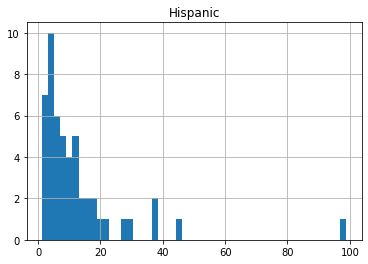

In [215]:
us_census.hist(column='Hispanic', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D8C2AEA48>]],
      dtype=object)

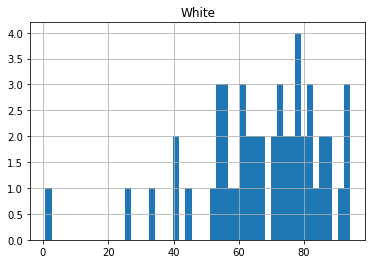

In [216]:
us_census.hist(column='White', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D8C38E308>]],
      dtype=object)

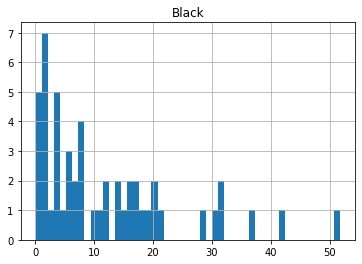

In [217]:
us_census.hist(column='Black', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D8C68BA08>]],
      dtype=object)

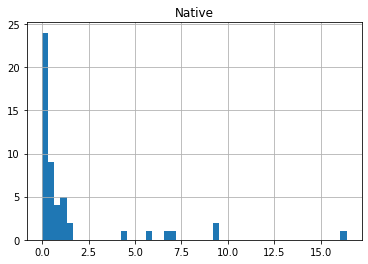

In [218]:
us_census.hist(column='Native', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D8C7C3C48>]],
      dtype=object)

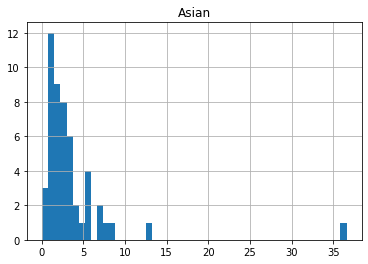

In [219]:
us_census.hist(column='Asian', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D8CA2D4C8>]],
      dtype=object)

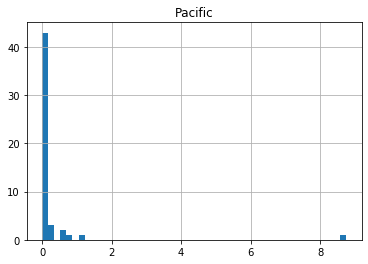

In [220]:
us_census.hist(column='Pacific', bins=50)

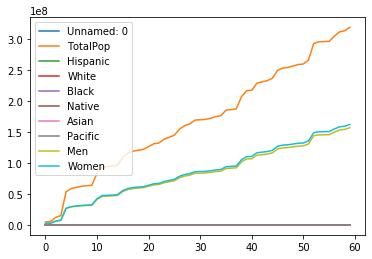

In [221]:
'''Phew. You’ve definitely impressed your boss on your first day of work.

But is there a way you really convey the power of pandas and Python over the drudgery of csv and Excel?

Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, 
or the cleaning you have already done may give you the ease of manipulation you’ve been searching for.'''

ts = us_census.cumsum()
ts.plot();

<Figure size 432x288 with 0 Axes>

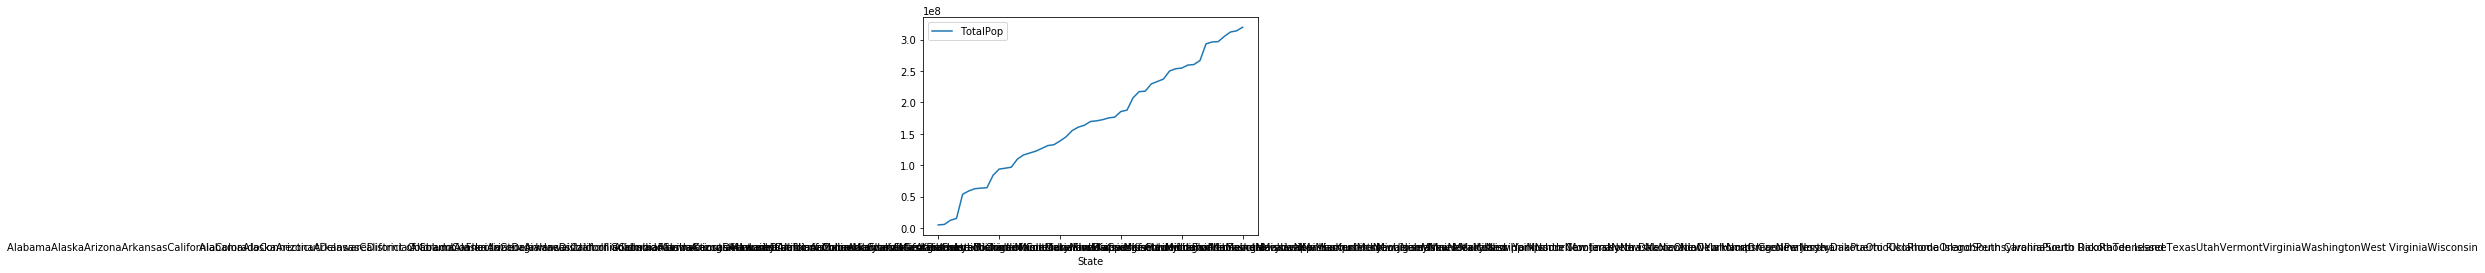

In [223]:
plt.figure();
ts.plot(x="State", y="TotalPop");

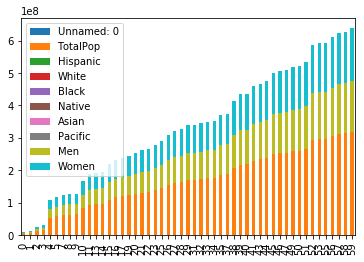

In [226]:

ts.plot.bar(stacked=True)

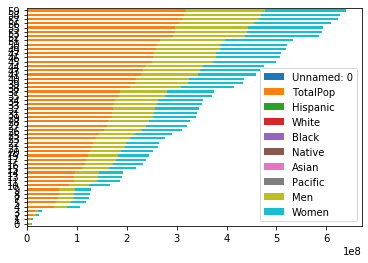

In [227]:
ts.plot.barh(stacked=True)

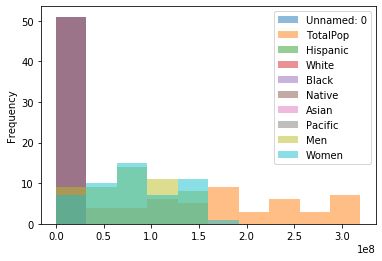

In [228]:
ts.plot.hist(alpha=0.5)

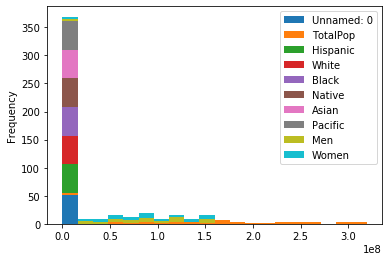

In [229]:
ts.plot.hist(stacked=True, bins=20)

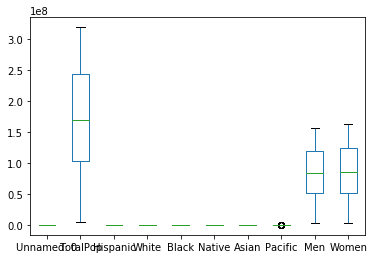

In [231]:
ts.plot.box()

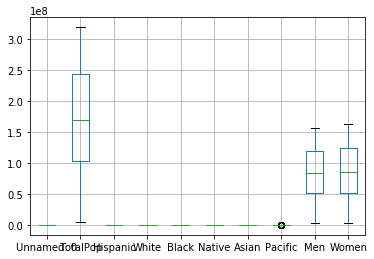

In [233]:
ts.boxplot()

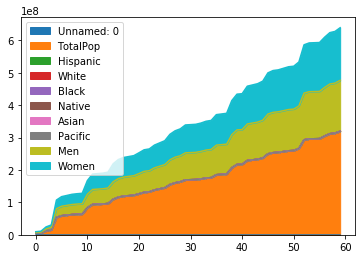

In [234]:
ts.plot.area()

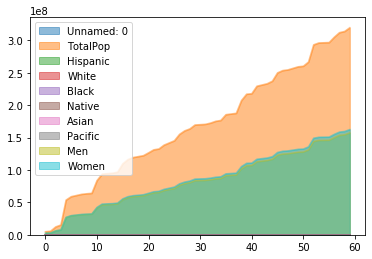

In [235]:
ts.plot.area(stacked=False)